In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
import time
import math
import seaborn as sns
import sys
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import scipy.stats as st

In [2]:
def joint_kde(data):
    """
  create joint KDE of two variables
  input: input 2D numpy array

  """ 
    x = data[:,0]
    y = data[:,1]
    
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)
    
    delta = np.complex(0,100)
    X, Y = np.mgrid[xmin:xmax:delta, ymin:ymax:delta]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x,y])
    kernel = st.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    return Z


In [3]:
def marginal_kde(X):
    """
    create marginal KDE for one dimensional vector
    input: input vector 
    """
    deltaX = (max(X) - min(X))/100
    xmin = min(X) - deltaX
    xmax = max(X) + deltaX
    X = X.reshape(-1,1)
    X_plot = np.linspace(xmin, xmax, 100)[:, np.newaxis]
    kde = KernelDensity(kernel = 'gaussian', bandwidth =0.01).fit(X)
    log_dens = kde.score_samples(X_plot)
    return np.exp(log_dens)


In [4]:
# load input
input = pd.read_csv('n90pol.csv')
input['orientation'].unique()
pdata = input.values
input_2 = input[input['orientation']==2]
input_3 = input[input['orientation']==3]
input_4 = input[input['orientation']==4]
input_5 = input[input['orientation']==5]

pdata_2 = input_2.values
pdata_3 = input_3.values
pdata_4 = input_4.values
pdata_5 = input_5.values


#data for conditional probabilities
amygdala_2 = np.array(input_2['amygdala']).reshape(len(input_2['amygdala']),)
acc_2 = np.array(input_2['acc']).reshape(len(input_2['amygdala']),)

amygdala_3 = np.array(input_3['amygdala']).reshape(len(input_3['amygdala']),)
acc_3 = np.array(input_3['acc']).reshape(len(input_3['amygdala']),)

amygdala_4 = np.array(input_4['amygdala']).reshape(len(input_4['amygdala']),)
acc_4 = np.array(input_4['acc']).reshape(len(input_4['amygdala']),)

amygdala_5 = np.array(input_5['amygdala']).reshape(len(input_5['amygdala']),)
acc_5 = np.array(input_5['acc']).reshape(len(input_5['amygdala']),)

input = input.drop(columns='orientation' )
pdata = input.values

In [5]:
# input = input.drop(columns=['orientation'])
amygdala_vec = np.array(input['amygdala']).reshape(1,90)
acc_vec = np.array(input['acc']).reshape(1,90)
Y = acc_vec.reshape(90L,)
X = amygdala_vec.reshape(90L,)

In [6]:
acc_vec.shape
pdata.shape

(90L, 2L)

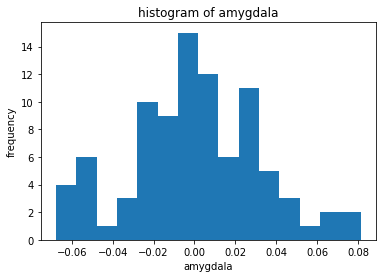

In [7]:
X2 = amygdala_vec.reshape(90,1)
plt.hist(X2, bins=15)
plt.xlabel('amygdala')
plt.ylabel('frequency')
plt.title('histogram of amygdala')
plt.show()

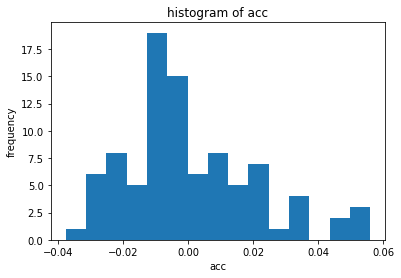

In [12]:
X1 = acc_vec.reshape(90,1)
plt.hist(X1, bins=15)
plt.xlabel('acc')
plt.ylabel('frequency')
plt.title('histogram of acc')
plt.show()

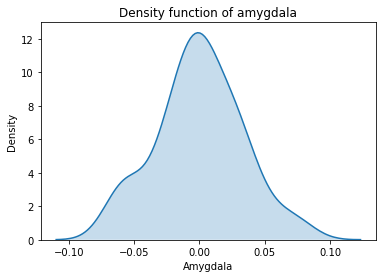

In [6]:
#density function of amygdala using seaborn package (scott method for bandwidth)

sns.kdeplot(X, shade=True)
plt.xlabel('Amygdala')
plt.ylabel('Density')
plt.title('Density function of amygdala')
plt.show()

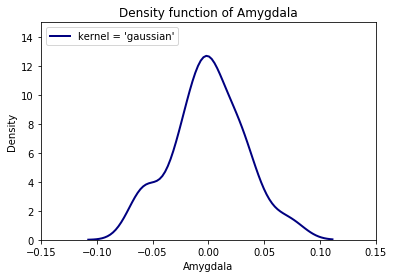

In [7]:
#density function of amygdala using KernelDensity from Sklearn.neighbors by tuning the bandwidth

x = amygdala_vec.reshape(90L,1L)
ymin = np.amin(amygdala_vec)
ymax= np.amax(amygdala_vec)
X_plot = np.linspace(ymin-0.04, ymax+0.03, 90).reshape(90L,1L)

fig, ax = plt.subplots()

colors = ['navy']
kernels = ['gaussian']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.013).fit(x)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:,0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.legend(loc='upper left')
plt.xlabel('Amygdala')
plt.ylabel('Density')
plt.title('Density function of Amygdala')
ax.set_xlim(-0.15, 0.15)
ax.set_ylim(0, 15)
plt.show()

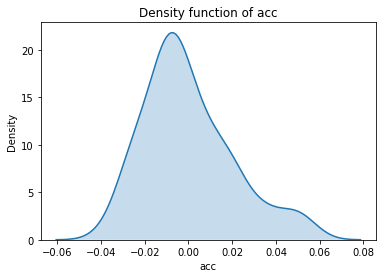

In [9]:
#density function of acc using seaborn package (scott method for bandwidth)

sns.kdeplot(Y, shade=True)
plt.xlabel('acc')
plt.ylabel('Density')
plt.title('Density function of acc')
plt.show()

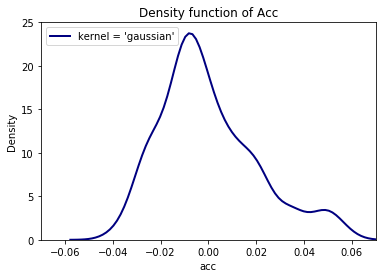

In [11]:
#density function of acc using KernelDensity from Sklearn.neighbors by tuning the bandwidth

x = acc_vec.reshape(90L,1L)
ymin = np.amin(acc_vec)
ymax= np.amax(acc_vec)
X_plot = np.linspace(ymin-0.02, ymax+0.02, 90).reshape(90L,1L)

fig, ax = plt.subplots()

colors = ['navy']
kernels = ['gaussian']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.006).fit(x)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:,0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.legend(loc='upper left')
plt.xlabel('acc')
plt.ylabel('Density')
plt.title('Density function of Acc')
ax.set_xlim(-0.07, 0.07)
ax.set_ylim(0, 25)
plt.show()

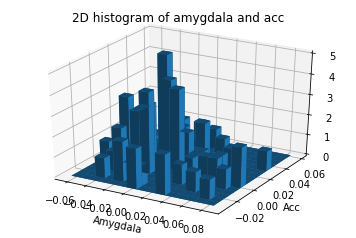

In [16]:
# 2D histogram 
pdata = input.values
min_data = pdata.min(0)
max_data = pdata.max(0)
nbin = 15        # you can change the number of bins in each dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(pdata[:,0], pdata[:,1], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
plt.xlabel('Amygdala')
plt.ylabel('Acc')
plt.title('2D histogram of amygdala and acc')
plt.show()

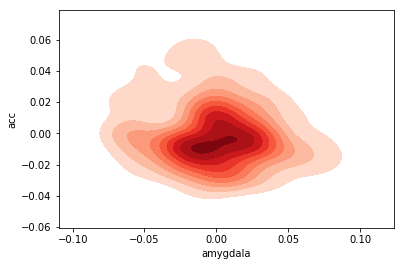

In [22]:
# Plotting the KDE Plot 
sns.kdeplot(X,Y, 
            color='r', shade=True, Label='Iris_Setosa', 
            cmap="Reds", shade_lowest=False)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.show()

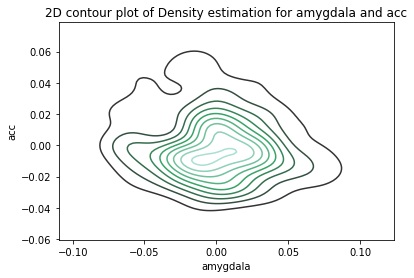

In [21]:
sns.kdeplot(X,Y)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('2D contour plot of Density estimation for amygdala and acc')
plt.show()

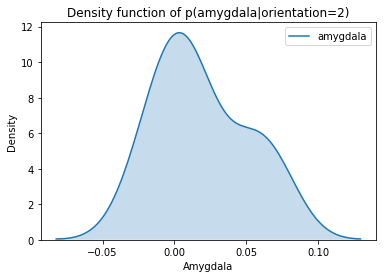

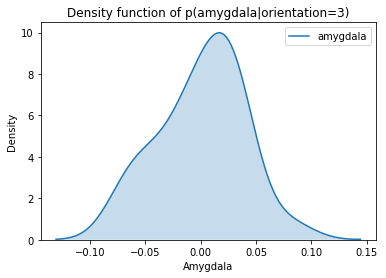

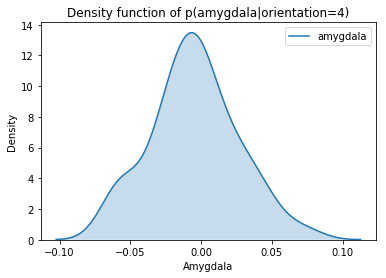

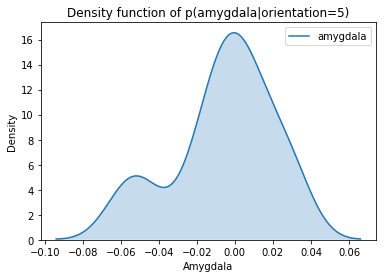

In [39]:
#density function of p(amygdala|orientation=2) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_2['amygdala'], shade=True)
plt.xlabel('Amygdala')
plt.ylabel('Density')
plt.title('Density function of p(amygdala|orientation=2)')
plt.show()

#density function of p(amygdala|orientation=3) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_3['amygdala'], shade=True)
plt.xlabel('Amygdala')
plt.ylabel('Density')
plt.title('Density function of p(amygdala|orientation=3)')
plt.show()

#density function of p(amygdala|orientation=4) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_4['amygdala'], shade=True)
plt.xlabel('Amygdala')
plt.ylabel('Density')
plt.title('Density function of p(amygdala|orientation=4)')
plt.show()

#density function of p(amygdala|orientation=5) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_5['amygdala'], shade=True)
plt.xlabel('Amygdala')
plt.ylabel('Density')
plt.title('Density function of p(amygdala|orientation=5)')
plt.show()

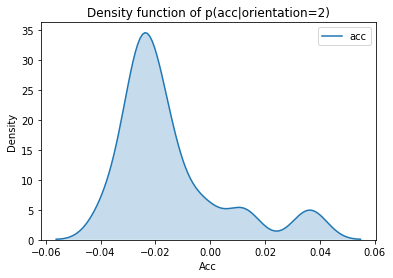

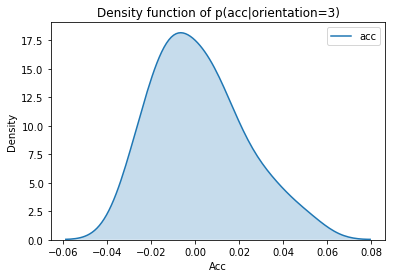

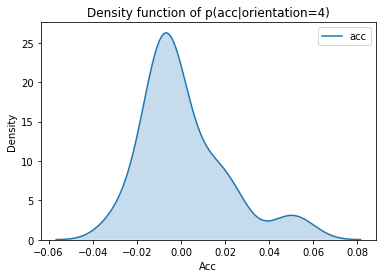

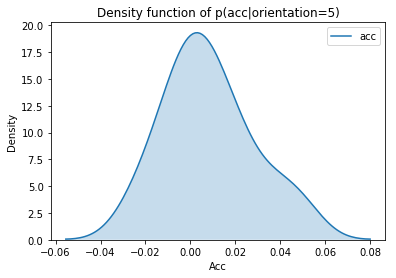

In [38]:
#density function of p(acc|orientation=2) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_2['acc'], shade=True)
plt.xlabel('Acc')
plt.ylabel('Density')
plt.title('Density function of p(acc|orientation=2)')
plt.show()


#density function of p(acc|orientation=3) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_3['acc'], shade=True)
plt.xlabel('Acc')
plt.ylabel('Density')
plt.title('Density function of p(acc|orientation=3)')
plt.show()

#density function of p(acc|orientation=4) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_4['acc'], shade=True)
plt.xlabel('Acc')
plt.ylabel('Density')
plt.title('Density function of p(acc|orientation=4)')
plt.show()

#density function of p(acc|orientation=5) using seaborn package (scott method for bandwidth)

sns.kdeplot(input_5['acc'], shade=True)
plt.xlabel('Acc')
plt.ylabel('Density')
plt.title('Density function of p(acc|orientation=5)')
plt.show()

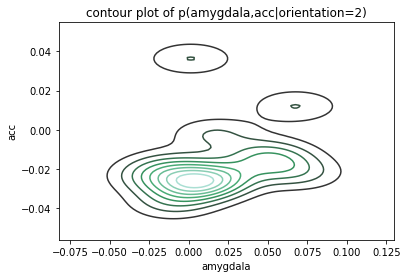

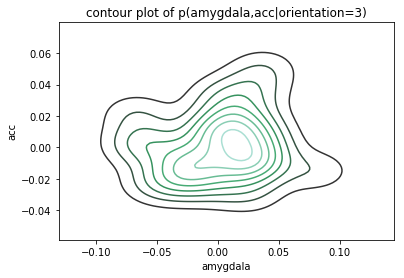

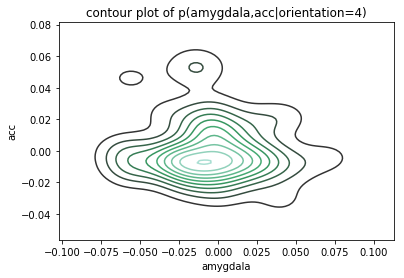

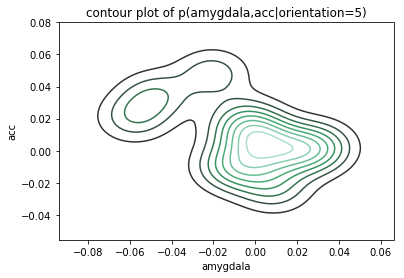

In [36]:
#kernel density estimation of P(amygdala, acc|orientation = c) c= 2,…,5
sns.kdeplot(amygdala_2,acc_2)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('contour plot of p(amygdala,acc|orientation=2)')
plt.show()

sns.kdeplot(amygdala_3,acc_3)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('contour plot of p(amygdala,acc|orientation=3)')
plt.show()

sns.kdeplot(amygdala_4,acc_4)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('contour plot of p(amygdala,acc|orientation=4)')
plt.show()

sns.kdeplot(amygdala_5,acc_5)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('contour plot of p(amygdala,acc|orientation=5)')
plt.show()

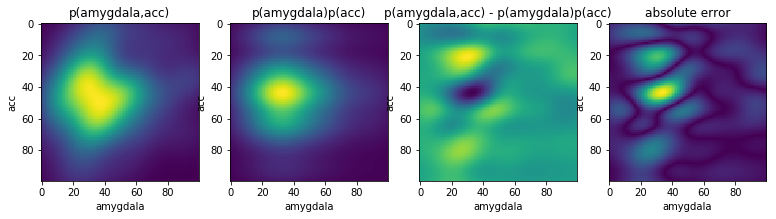

In [22]:
#showing if the amygdala and acc are independent

kde_joint_image = joint_kde(pdata)

kde_marg_1 = marginal_kde(pdata[:,0])
kde_marg_2 = marginal_kde(pdata[:,1])

kde_outer_image = np.outer(kde_marg_1, kde_marg_2)

fig, ax = plt.subplots(1,4, figsize = (13,5))

kde_diff = kde_joint_image - kde_outer_image
kde_diff2 = abs(kde_joint_image - kde_outer_image)

ax[0].set_title("p(amygdala,acc)")
ax[0].set_xlabel("amygdala")
ax[0].set_ylabel("acc")
ax[0].imshow(kde_joint_image)
ax[1].set_title("p(amygdala)p(acc)")
ax[1].set_xlabel("amygdala")
ax[1].set_ylabel("acc")
ax[1].imshow(kde_outer_image)
ax[2].set_title("p(amygdala,acc) - p(amygdala)p(acc)")
ax[2].set_xlabel("amygdala")
ax[2].set_ylabel("acc")
ax[2].imshow(kde_diff)
ax[3].set_title("absolute error")
ax[3].set_xlabel("amygdala")
ax[3].set_ylabel("acc")
ax[3].imshow(kde_diff2)
plt.show()

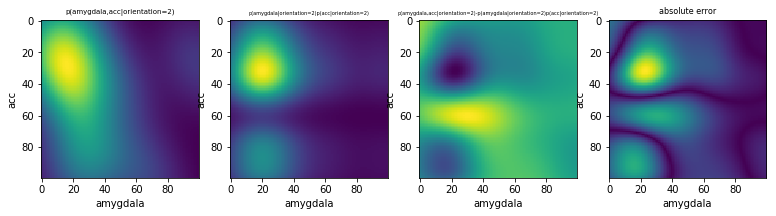

In [30]:
#showing if the amygdala and acc are conditionally independent when orientation=2

kde_joint_image = joint_kde(pdata_2)

kde_marg_1 = marginal_kde(pdata_2[:,0])
kde_marg_2 = marginal_kde(pdata_2[:,1])

kde_outer_image = np.outer(kde_marg_1, kde_marg_2)

fig, ax = plt.subplots(1,4, figsize = (13,5))

kde_diff = kde_joint_image - kde_outer_image
kde_diff2 = abs(kde_joint_image - kde_outer_image)

ax[0].set_title("p(amygdala,acc|orientation=2)", fontsize=7)
ax[0].set_xlabel("amygdala")
ax[0].set_ylabel("acc")
ax[0].imshow(kde_joint_image)
ax[1].set_title("p(amygdala|orientation=2)p(acc|orientation=2)", fontsize=5)
ax[1].set_xlabel("amygdala")
ax[1].set_ylabel("acc")
ax[1].imshow(kde_outer_image)
ax[2].set_title("p(amygdala,acc|orientation=2)-p(amygdala|orientation=2)p(acc|orientation=2)", fontsize=5)
ax[2].set_xlabel("amygdala")
ax[2].set_ylabel("acc")
ax[2].imshow(kde_diff)
ax[3].set_title("absolute error", fontsize=8)
ax[3].set_xlabel("amygdala")
ax[3].set_ylabel("acc")
ax[3].imshow(kde_diff2)
plt.show()

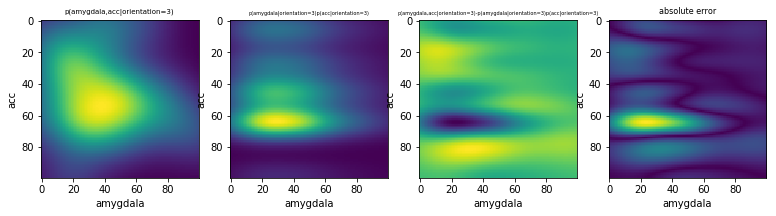

In [31]:
#showing if the amygdala and acc are conditionally independent when orientation=3

kde_joint_image = joint_kde(pdata_3)

kde_marg_1 = marginal_kde(pdata_3[:,0])
kde_marg_2 = marginal_kde(pdata_3[:,1])

kde_outer_image = np.outer(kde_marg_1, kde_marg_2)

fig, ax = plt.subplots(1,4, figsize = (13,5))

kde_diff = kde_joint_image - kde_outer_image
kde_diff2 = abs(kde_joint_image - kde_outer_image)

ax[0].set_title("p(amygdala,acc|orientation=3)", fontsize=7)
ax[0].set_xlabel("amygdala")
ax[0].set_ylabel("acc")
ax[0].imshow(kde_joint_image)
ax[1].set_title("p(amygdala|orientation=3)p(acc|orientation=3)", fontsize=5)
ax[1].set_xlabel("amygdala")
ax[1].set_ylabel("acc")
ax[1].imshow(kde_outer_image)
ax[2].set_title("p(amygdala,acc|orientation=3)-p(amygdala|orientation=3)p(acc|orientation=3)", fontsize=5)
ax[2].set_xlabel("amygdala")
ax[2].set_ylabel("acc")
ax[2].imshow(kde_diff)
ax[3].set_title("absolute error", fontsize=8)
ax[3].set_xlabel("amygdala")
ax[3].set_ylabel("acc")
ax[3].imshow(kde_diff2)
plt.show()

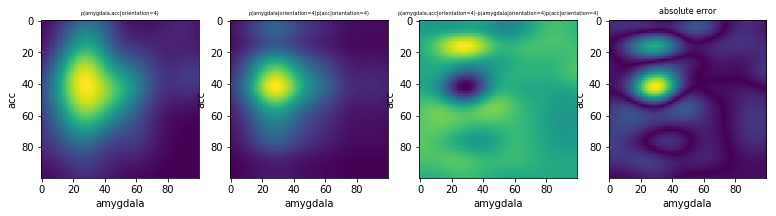

In [34]:
#showing if the amygdala and acc are conditionally independent when orientation=4

kde_joint_image = joint_kde(pdata_4)

kde_marg_1 = marginal_kde(pdata_4[:,0])
kde_marg_2 = marginal_kde(pdata_4[:,1])

kde_outer_image = np.outer(kde_marg_1, kde_marg_2)

fig, ax = plt.subplots(1,4, figsize = (13,5))

kde_diff = kde_joint_image - kde_outer_image
kde_diff2 = abs(kde_joint_image - kde_outer_image)

ax[0].set_title("p(amygdala,acc|orientation=4)", fontsize=5)
ax[0].set_xlabel("amygdala")
ax[0].set_ylabel("acc")
ax[0].imshow(kde_joint_image)
ax[1].set_title("p(amygdala|orientation=4)p(acc|orientation=4)", fontsize=5)
ax[1].set_xlabel("amygdala")
ax[1].set_ylabel("acc")
ax[1].imshow(kde_outer_image)
ax[2].set_title("p(amygdala,acc|orientation=4)-p(amygdala|orientation=4)p(acc|orientation=4)", fontsize=5)
ax[2].set_xlabel("amygdala")
ax[2].set_ylabel("acc")
ax[2].imshow(kde_diff)
ax[3].set_title("absolute error", fontsize=8)
ax[3].set_xlabel("amygdala")
ax[3].set_ylabel("acc")
ax[3].imshow(kde_diff2)
plt.show()

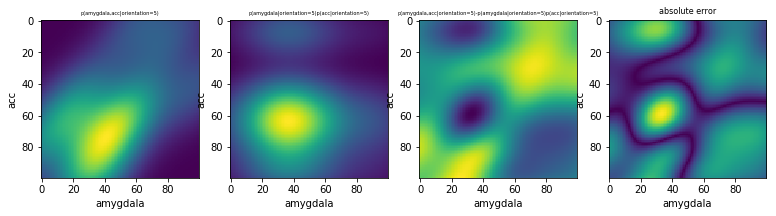

In [35]:
#showing if the amygdala and acc are conditionally independent when orientation=5

kde_joint_image = joint_kde(pdata_5)

kde_marg_1 = marginal_kde(pdata_5[:,0])
kde_marg_2 = marginal_kde(pdata_5[:,1])

kde_outer_image = np.outer(kde_marg_1, kde_marg_2)

fig, ax = plt.subplots(1,4, figsize = (13,5))

kde_diff = kde_joint_image - kde_outer_image
kde_diff2 = abs(kde_joint_image - kde_outer_image)

ax[0].set_title("p(amygdala,acc|orientation=5)", fontsize=5)
ax[0].set_xlabel("amygdala")
ax[0].set_ylabel("acc")
ax[0].imshow(kde_joint_image)
ax[1].set_title("p(amygdala|orientation=5)p(acc|orientation=5)", fontsize=5)
ax[1].set_xlabel("amygdala")
ax[1].set_ylabel("acc")
ax[1].imshow(kde_outer_image)
ax[2].set_title("p(amygdala,acc|orientation=5)-p(amygdala|orientation=5)p(acc|orientation=5)", fontsize=5)
ax[2].set_xlabel("amygdala")
ax[2].set_ylabel("acc")
ax[2].imshow(kde_diff)
ax[3].set_title("absolute error", fontsize=8)
ax[3].set_xlabel("amygdala")
ax[3].set_ylabel("acc")
ax[3].imshow(kde_diff2)
plt.show()